#**Datathon 2023 Will and Calvin**
###*Chevron Challenge Dataset*

**Read Ins and Loading Data:**

In [25]:
## download packages
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor


In [26]:
## read dataset
df = pd.read_csv("Investment_Data_Train.csv")
df

,Unnamed: 0,MSN,StateCode,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,0,BDFDB,AK,2015,21.000,Alaska,35.027804,16.0,3345612.0
1,1,BDPRP,AK,2015,4.000,Alaska,35.027804,16.0,3345612.0
2,2,BFFDB,AK,2015,21.000,Alaska,35.027804,16.0,3345612.0
3,3,BFPRP,AK,2015,4.000,Alaska,35.027804,16.0,3345612.0
4,4,CLPRB,AK,2015,17747.000,Alaska,35.027804,16.0,3345612.0
...,...,...,...,...,...,...,...,...,...
7590,7590,TEPRB,X3,2019,5106671.000,Federal Offshore - Gulf of Mexico,NaN,NaN,NaN
7591,7591,COPRK,X5,2019,5.698,Federal Offshore - Pacific,NaN,NaN,NaN
7592,7592,PAPRB,X5,2019,25350.000,Federal Offshore - Pacific,NaN,NaN,NaN
7593,7593,PAPRP,X5,2019,4449.000,Federal Offshore - Pacific,NaN,NaN,NaN


**Change Data to wide form**

In [27]:
df_temp = df[['StateCode',"Year", "Amount", "MSN"]]

In [28]:
constants = df[['StateCode','Year','CO2 Emissions (Mmt)','TotalNumberofInvestments','TotalAmountofAssistance']]
constants = constants.groupby(['StateCode','Year']).mean().reset_index()

In [29]:
pivot = df_temp.pivot(index = ['StateCode','Year'], columns = ['MSN'])
pivot = pivot.reset_index()
pivot

StateCode  Year Amount                                                    \
MSN                  BDFDB BDPRP BFFDB BFPRP    CLPRB   CLPRK   CLPRP  COPRK   
0          AK  2015   21.0   4.0  21.0   4.0  17747.0  15.073  1177.0  5.717   
1          AK  2016   27.0   5.0  27.0   5.0  13942.0  14.957   932.0  5.722   
2          AK  2017   29.0   5.0  29.0   5.0  14365.0  14.978   959.0  5.723   
3          AK  2018   15.0   3.0  15.0   3.0  13752.0  15.253   902.0  5.706   
4          AK  2019    0.0   0.0   0.0   0.0  14867.0  15.252   975.0  5.698   
..        ...   ...    ...   ...   ...   ...      ...     ...     ...    ...   
265        X5  2015    NaN   NaN   NaN   NaN      NaN     NaN     NaN  5.717   
266        X5  2016    NaN   NaN   NaN   NaN      NaN     NaN     NaN  5.722   
267        X5  2017    NaN   NaN   NaN   NaN      NaN     NaN     NaN  5.723   
268        X5  2018    NaN   NaN   NaN   NaN      NaN     NaN     NaN  5.706   
269        X5  2019    NaN   NaN   NaN   NaN      NaN     NaN     NaN  5.698   

     ...                                                                   \
MSN  ...    REPRB SOTCB      TEPRB     TETCB WDEXB   WDPRB   WDTCB  WSTCB   
0    ...  23807.0   3.0  1429942.0  614242.0   0.0  6865.0  6865.0  622.0   
1    ...  25155.0  14.0  1435363.0  593662.0   0.0  7636.0  7636.0  412.0   
2    ...  23620.0  20.0  1454196.0  601492.0   0.0  6501.0  6501.0  436.0   
3    ...  24158.0  28.0  1410604.0  604644.0   0.0  6910.0  6910.0  456.0   
4    ...  22754.0  40.0  1370342.0  605689.0   0.0  6418.0  6418.0  386.0   
..   ...      ...   ...        ...       ...   ...     ...     ...    ...   
265  ...      NaN   NaN    65465.0       NaN   NaN     NaN     NaN    NaN   
266  ...      NaN   NaN    35156.0       NaN   NaN     NaN     NaN    NaN   
267  ...      NaN   NaN    32701.0       NaN   NaN     NaN     NaN    NaN   
268  ...      NaN   NaN    27811.0       NaN   NaN     NaN     NaN    NaN   
269  ...      NaN   NaN    25350.0       NaN   NaN     NaN     NaN    NaN   

                     
MSN   WWPRB   WYTCB  
0    7488.0  1488.0  
1    8048.0  1563.0  
2    6937.0  1305.0  
3    7366.0  1411.0  
4    6803.0  1270.0  
..      ...     ...  
265     NaN     NaN  
266     NaN     NaN  
267     NaN     NaN  
268     NaN     NaN  
269     NaN     NaN  

[270 rows x 31 columns]

In [30]:
merged_pivot = pivot.merge(constants, on= ['StateCode','Year'], how ="left")
merged_pivot = merged_pivot.drop(['StateCode', 'Year'], axis = 1)
merged_pivot

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,"(StateCode, )","(Year, )","(Amount, BDFDB)","(Amount, BDPRP)","(Amount, BFFDB)","(Amount, BFPRP)","(Amount, CLPRB)","(Amount, CLPRK)","(Amount, CLPRP)","(Amount, COPRK)",...,"(Amount, TETCB)","(Amount, WDEXB)","(Amount, WDPRB)","(Amount, WDTCB)","(Amount, WSTCB)","(Amount, WWPRB)","(Amount, WYTCB)",CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,AK,2015,21.0,4.0,21.0,4.0,17747.0,15.073,1177.0,5.717,...,614242.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0,35.027804,16.0,3345612.0
1,AK,2016,27.0,5.0,27.0,5.0,13942.0,14.957,932.0,5.722,...,593662.0,0.0,7636.0,7636.0,412.0,8048.0,1563.0,33.405611,14.0,2247734.0
2,AK,2017,29.0,5.0,29.0,5.0,14365.0,14.978,959.0,5.723,...,601492.0,0.0,6501.0,6501.0,436.0,6937.0,1305.0,33.729130,18.0,13509662.0
3,AK,2018,15.0,3.0,15.0,3.0,13752.0,15.253,902.0,5.706,...,604644.0,0.0,6910.0,6910.0,456.0,7366.0,1411.0,34.514589,44.0,18236626.0
4,AK,2019,0.0,0.0,0.0,0.0,14867.0,15.252,975.0,5.698,...,605689.0,0.0,6418.0,6418.0,386.0,6803.0,1270.0,34.259440,32.0,13734021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,X5,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,X5,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,X5,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,X5,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# update the names of the columns to strings
for name in merged_pivot.columns:
  if type(name) != str:
    new_name = ''
    for word in name:
      new_name += word
    merged_pivot[new_name] = merged_pivot[name]
    merged_pivot = merged_pivot.drop(columns = [name])

In [32]:
merged_pivot.head()

,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,StateCode,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,...,AmountREPRB,AmountSOTCB,AmountTEPRB,AmountTETCB,AmountWDEXB,AmountWDPRB,AmountWDTCB,AmountWSTCB,AmountWWPRB,AmountWYTCB
0,35.027804,16.0,3345612.0,AK,2015,21.0,4.0,21.0,4.0,17747.0,...,23807.0,3.0,1429942.0,614242.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0
1,33.405611,14.0,2247734.0,AK,2016,27.0,5.0,27.0,5.0,13942.0,...,25155.0,14.0,1435363.0,593662.0,0.0,7636.0,7636.0,412.0,8048.0,1563.0
2,33.729130,18.0,13509662.0,AK,2017,29.0,5.0,29.0,5.0,14365.0,...,23620.0,20.0,1454196.0,601492.0,0.0,6501.0,6501.0,436.0,6937.0,1305.0
3,34.514589,44.0,18236626.0,AK,2018,15.0,3.0,15.0,3.0,13752.0,...,24158.0,28.0,1410604.0,604644.0,0.0,6910.0,6910.0,456.0,7366.0,1411.0
4,34.259440,32.0,13734021.0,AK,2019,0.0,0.0,0.0,0.0,14867.0,...,22754.0,40.0,1370342.0,605689.0,0.0,6418.0,6418.0,386.0,6803.0,1270.0


In [33]:
import seaborn as sns
summary = merged_pivot['TotalAmountofAssistance'].describe()
print(summary)

count    2.500000e+02
mean     1.660597e+07
std      4.496579e+07
min      5.408200e+04
25%      1.107306e+06
50%      2.447825e+06
75%      6.090170e+06
max      3.156357e+08
Name: TotalAmountofAssistance, dtype: float64


     TotalAmountofAssistance StateCode  Year
13                79970512.0        AR  2018
14                60034678.0        AR  2019
19                95135122.0        AZ  2019
20                30077512.0        CA  2015
21                59755992.0        CA  2016
22                30392556.0        CA  2017
23                28208367.0        CA  2018
24               158244985.0        CA  2019
28                29876375.0        CO  2018
48                49550089.0        FL  2018
49                52936642.0        FL  2019
85               315635700.0        KY  2015
94               250695185.0        LA  2019
118               55322766.0        MN  2018
119               29572563.0        MN  2019
126               96309030.0        MS  2016
135              202376181.0        NC  2015
136              190472938.0        NC  2016
137              235434075.0        NC  2017
138              141776088.0        NC  2018
139              126884709.0        NC  2019
167       

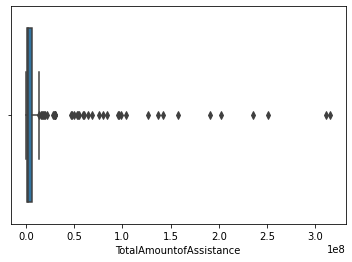

In [34]:
# Create a boxplot
out_df = merged_pivot[['TotalAmountofAssistance', 'StateCode', 'Year']]

sns.boxplot(x= merged_pivot['TotalAmountofAssistance'])

# Find outliers
Q1 = summary['25%']
Q3 = summary['75%']
IQR = Q3 - Q1
outlier_threshold = 3 * IQR
outliers = out_df[(out_df['TotalAmountofAssistance'] < (Q1 - outlier_threshold)) | ( out_df['TotalAmountofAssistance'] > (Q3 + outlier_threshold))]
print(outliers)

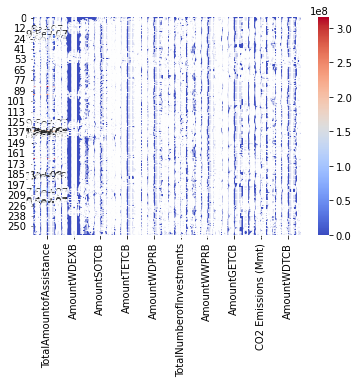

In [66]:
import matplotlib.pyplot as plt

corr = merged_pivot.corr()

# get the top 10 most positively correlated features
top_10_corr = corr.nlargest(10, 'TotalAmountofAssistance')['TotalAmountofAssistance'].index

# create a sub-dataframe with only the top 10 correlated features
sub_df = merged_pivot[top_10_corr]


sns.heatmap(sub_df, cmap='coolwarm', annot=True)
plt.show()

Initalize Model Functions

In [35]:
def multiple_linear_reg(X_train, X_test, y_train, y_test):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  

  # Create a LinearRegression object
  reg = LinearRegression()

  # Fit the model to the data
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  # Print the coefficients of the model
  coeffs = reg.coef_

  # Mean squared error
  mse = mean_squared_error(y_test, y_pred)
  rmse = mse**(1/2)
  return rmse


In [36]:
def polynomial_reg(X_train, X_test, y_train, y_test):
  # Split the data into training and testing sets
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  ### Polynomial Regression
  rmses = {}
  for deg in range(1, 3):
    poly = PolynomialFeatures(degree=deg)

    # Transform the independent variables into polynomial features
    X_poly = poly.fit_transform(X_train)

    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model to the transformed features
    model.fit(X_poly, y_train)

    # Use the model to make predictions on new data
    X_test_poly = poly.fit_transform(X_test)
    y_pred = model.predict(X_test_poly)

    # Mean squared error
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**(1/2)
    rmses[deg] = rmse

  return min_key(rmses)


In [37]:
def lasso_reg(X_train, X_test, y_train, y_test):
  # Split the data into training and testing sets
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)
  rmses = {}
  for a in range(20):
    # Initialize and fit the Lasso model
    lasso = Lasso(alpha= a/20, max_iter = 10000)
    lasso.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lasso.predict(X_test)

    # Calculate the RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmses[a/20] = rmse

  return min_key(rmses)


In [38]:
def random_forest(X_train, X_test, y_train, y_test):
  # Split the data into training and testing sets
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

  # Initialize the model and set the number of decision trees
  rf = RandomForestRegressor(n_estimators=1000)

  # Train the model on the training data
  rf.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = rf.predict(X_test)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  rmse = mse ** 0.5
  return rmse


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

def gradient_Booster_reg(X_train, X_test, y_train, y_test):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  gb = GradientBoostingRegressor(n_estimators=1000)

  # Train the model on the training data
  gb.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = gb.predict(X_test)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  rmse = mse ** 0.5
  return rmse


In [40]:
def min_key(dictionary):
    min_value = min(dictionary.values())
    for key, value in dictionary.items():
        if value == min_value:
            return value

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

def elastic_net_reg(X_train, X_test, y_train, y_test):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  rmses = {}
  for a in range(10):
    for r in range(10):
      # Create an ElasticNet model and fit it to the training data
      enet = ElasticNet(alpha= a/10, l1_ratio= r/10)
      enet.fit(X_train, y_train)

      # Use the model to make predictions on the test data
      y_pred = enet.predict(X_test)

      # Calculate the mean squared error
      mse = mean_squared_error(y_test, y_pred)
      rmse = mse ** 0.5
      rmses[(a/10, r/10)] = rmse

  return min_key(rmses)


### *Create Baseline Linear Model with No additional Data*

In [42]:
# Define the predictor variables (X) and the target variable (y)
merged_pivot = merged_pivot.dropna(subset = ['TotalAmountofAssistance'])

X = merged_pivot.drop(['TotalAmountofAssistance', 'StateCode'], axis = 1)
y = merged_pivot['TotalAmountofAssistance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [43]:
multiple_linear_reg(X_train, X_test, y_train, y_test)

33799823.18333936

### Test Additional Models:

Polynomail Regression

In [44]:
polynomial_reg(X_train, X_test, y_train, y_test)

33799823.183720745

Lasso Model

In [45]:
lasso_reg(X_train, X_test, y_train, y_test)

<ipython-input-37-128a9672a6c1>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.614e+17, tolerance: 4.050e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklear

32746792.424432583

Random Forest

In [46]:
random_forest(X_train, X_test, y_train, y_test)

28071493.618871603

Gradient Boost

In [47]:
gradient_Booster_reg(X_train, X_test, y_train, y_test)

29195879.36672021

## **Adding additional DataSets**


In [48]:
# political influence could sway the amount of investment in renewables
# https://news.gallup.com/poll/226643/2017-party-affiliation-state.aspx
political = pd.read_csv('/content/political_party.csv').drop(columns = ['Sample size'])
# the amount of sunlight recieved could change the desire to invest in solar
# https://www.currentresults.com/Weather/US/average-annual-state-sunshine.php
sunny = pd.read_csv('/content/weather_data.csv')
# the number of renewable incentives by state
# https://www.dsireusa.org/
incentives = pd.read_csv('/content/state incentives.csv')


In [49]:
codes = df[['StateCode','State']]
codes = codes.drop_duplicates().reset_index()

In [50]:
political = political.merge(codes, on = 'State', how = "inner").drop(columns = "State")
sunny = sunny.merge(codes, on = 'State', how = "inner").drop(columns = "State")
incentives = incentives.merge(codes, on = "State", how = "inner").drop(columns = "State")

In [51]:
# now add this data to our original data
added_data = merged_pivot.merge(sunny, on = "StateCode", how = "left").drop(columns = "index")
added_data = added_data.merge(political, on = "StateCode", how = 'left').drop(columns = "index")
added_data = added_data.merge(incentives, on = "StateCode", how = "left").drop(columns = "index")
added_data

,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,StateCode,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,...,AmountWSTCB,AmountWWPRB,AmountWYTCB,% Sun,Total Hours,Clear Days,Republican/lean Rep.,No lean,Democrat/lean Dem.,Policies & Incentives
0,35.027804,16.0,3345612.0,AK,2015,21.0,4.0,21.0,4.0,17747.0,...,622.0,7488.0,1488.0,41.0,2061.0,61,0.39,0.29,0.32,20
1,33.405611,14.0,2247734.0,AK,2016,27.0,5.0,27.0,5.0,13942.0,...,412.0,8048.0,1563.0,41.0,2061.0,61,0.39,0.29,0.32,20
2,33.729130,18.0,13509662.0,AK,2017,29.0,5.0,29.0,5.0,14365.0,...,436.0,6937.0,1305.0,41.0,2061.0,61,0.39,0.29,0.32,20
3,34.514589,44.0,18236626.0,AK,2018,15.0,3.0,15.0,3.0,13752.0,...,456.0,7366.0,1411.0,41.0,2061.0,61,0.39,0.29,0.32,20
4,34.259440,32.0,13734021.0,AK,2019,0.0,0.0,0.0,0.0,14867.0,...,386.0,6803.0,1270.0,41.0,2061.0,61,0.39,0.29,0.32,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,64.092863,18.0,249960.0,WY,2015,0.0,0.0,1192.0,209.0,6538240.0,...,2.0,4905.0,35009.0,68.0,3073.0,114,0.57,0.18,0.25,20
246,61.259993,23.0,1359346.0,WY,2016,0.0,0.0,0.0,0.0,5169939.0,...,2.0,4358.0,40522.0,68.0,3073.0,114,0.57,0.18,0.25,20
247,62.796487,47.0,413987.0,WY,2017,0.0,0.0,0.0,0.0,5516757.0,...,0.0,5049.0,39806.0,68.0,3073.0,114,0.57,0.18,0.25,20
248,63.846081,53.0,573639.0,WY,2018,0.0,0.0,0.0,0.0,5315953.0,...,0.0,4934.0,36936.0,68.0,3073.0,114,0.57,0.18,0.25,20


### *Re-Test our Models*

In [52]:
from sklearn.preprocessing import StandardScaler
# Define the predictor variables (X) and the target variable (y)
X = added_data.drop(['StateCode', "TotalAmountofAssistance"], axis = 1)
y = added_data['TotalAmountofAssistance']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

x_train_df =  pd.DataFrame(X_train, columns=added_data.drop(['StateCode', "TotalAmountofAssistance"], axis = 1).columns)

In [55]:
multiple_linear_reg(X_train, X_test, y_train, y_test)

37793292.38802462

### Test Additional Models:

Polynomail Regression

In [56]:
polynomial_reg(X_train, X_test, y_train, y_test)

37793292.38842037

Lasso Model

In [57]:
lasso_reg(X_train, X_test, y_train, y_test)

<ipython-input-37-128a9672a6c1>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+17, tolerance: 4.050e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklear

34345530.47297702

Random Forest

In [58]:
random_forest(X_train, X_test, y_train, y_test)

27471084.26577275

Gradient Boost

In [59]:
gradient_Booster_reg(X_train, X_test, y_train, y_test)

26008973.90451274

## Feature Selection

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model
model = GradientBoostingRegressor(n_estimators = 1000)

# Define the RFE with the number of features to select
rfe = RFE(model, n_features_to_select=10)

# Fit the RFE on the dataset
rfe.fit(x_train_df, y_train)

# Print the selected features
print(rfe.support_)

# Print the ranking of the features
print(rfe.ranking_)

[False  True False False False False False False False  True False False
 False False False False False False  True  True False False  True  True
 False  True  True False False False  True False False False False False
 False  True False]
[ 8  1 16 13 24 26 23  5 21  1 18 12 29  3 19 20 15 28  1  1 11 10  1  1
  4  1  1  2  6  7  1  9 22 14 27 25 17  1 30]


In [61]:
X_train_rfe = rfe.transform(X_train)
model.fit(X_train_rfe, y_train)
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print("Root Mean Squared Error : ",rmse)
# no improvement from running it with feature selection

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


Root Mean Squared Error :  31419099.52028117


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [67]:
feature_ranking = rfe.ranking_

# Create a dictionary with feature names as keys and their ranking as values
feature_ranking_dict = dict(zip(x_train_df.columns, feature_ranking))

# Print the feature names and their ranking
for feature, ranking in feature_ranking_dict.items():
    print(f'{feature}: {ranking}')

CO2 Emissions (Mmt): 8
TotalNumberofInvestments: 1
Year: 16
AmountBDFDB: 13
AmountBDPRP: 24
AmountBFFDB: 26
AmountBFPRP: 23
AmountCLPRB: 5
AmountCLPRK: 21
AmountCLPRP: 1
AmountCOPRK: 18
AmountEMFDB: 12
AmountENPRP: 29
AmountGETCB: 3
AmountHYTCB: 19
AmountNCPRB: 20
AmountNGMPB: 15
AmountNGMPK: 28
AmountNGMPP: 1
AmountNUETB: 1
AmountPAPRB: 11
AmountPAPRP: 10
AmountREPRB: 1
AmountSOTCB: 1
AmountTEPRB: 4
AmountTETCB: 1
AmountWDEXB: 1
AmountWDPRB: 2
AmountWDTCB: 6
AmountWSTCB: 7
AmountWWPRB: 1
AmountWYTCB: 9
% Sun: 22
Total Hours: 14
Clear Days: 27
Republican/lean Rep.: 25
No lean: 17
Democrat/lean Dem.: 1
Policies & Incentives: 30


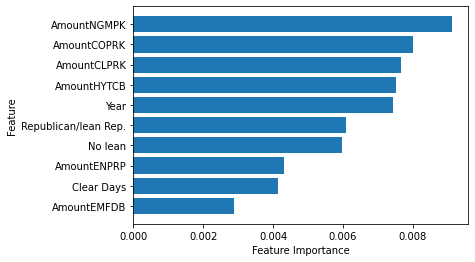

In [68]:
import matplotlib.pyplot as plt

# train your model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = x_train_df.columns

# Create a dataframe with feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by feature importances
feature_importances.sort_values(by='importance', ascending=True, inplace=True)
feature_importances = feature_importances.head(10)
# Plot the feature importances
plt.barh(y=feature_importances['feature'], width=feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Using Autoencoders to Compact Features

In [73]:
# because the data has many columns, we'll try using an autoencoding unsupervised algorithm to decrease the number of features
from keras.layers import Input, Dense
from keras.models import Model

# define the input shape and number of hidden units in the bottleneck layer
input_shape = (39,)
encoding_dim = 32

# define the input layer
input_data = Input(shape=input_shape)

# define the encoder layers
encoded = Dense(encoding_dim, activation='relu')(input_data)

# define the decoder layers
decoded = Dense(39, activation='sigmoid')(encoded)

# define the autoencoder model
autoencoder = Model(input_data, decoded)

# compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the model on the input data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
1/1 [==============================] - 1s 983ms/step - loss: 0.7625 - val_loss: 0.6926
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 0.7492 - val_loss: 0.6826
Epoch 3/50
1/1 [==============================] - 0s 35ms/step - loss: 0.7360 - val_loss: 0.6727
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.7229 - val_loss: 0.6628
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.7100 - val_loss: 0.6529
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.6970 - val_loss: 0.6430
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 0.6841 - val_loss: 0.6332
Epoch 8/50
1/1 [==============================] - 0s 32ms/step - loss: 0.6712 - val_loss: 0.6233
Epoch 9/50
1/1 [==============================] - 0s 49ms/step - loss: 0.6584 - val_loss: 0.6135
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 0.6456 - val_loss: 0.6037
Epoch 11/50
1/1 [===========

In [77]:
#encoder = autoencoder.predict(X)

In [79]:
# test any increase in performance with the autoencoders
#andom_forest(encoder, y)
# no increase in performance using the autoencoders either

## Adding Engineered Features

In [69]:
added_data.head()

,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,StateCode,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,...,AmountWSTCB,AmountWWPRB,AmountWYTCB,% Sun,Total Hours,Clear Days,Republican/lean Rep.,No lean,Democrat/lean Dem.,Policies & Incentives
0,35.027804,16.0,3345612.0,AK,2015,21.0,4.0,21.0,4.0,17747.0,...,622.0,7488.0,1488.0,41.0,2061.0,61,0.39,0.29,0.32,20
1,33.405611,14.0,2247734.0,AK,2016,27.0,5.0,27.0,5.0,13942.0,...,412.0,8048.0,1563.0,41.0,2061.0,61,0.39,0.29,0.32,20
2,33.729130,18.0,13509662.0,AK,2017,29.0,5.0,29.0,5.0,14365.0,...,436.0,6937.0,1305.0,41.0,2061.0,61,0.39,0.29,0.32,20
3,34.514589,44.0,18236626.0,AK,2018,15.0,3.0,15.0,3.0,13752.0,...,456.0,7366.0,1411.0,41.0,2061.0,61,0.39,0.29,0.32,20
4,34.259440,32.0,13734021.0,AK,2019,0.0,0.0,0.0,0.0,14867.0,...,386.0,6803.0,1270.0,41.0,2061.0,61,0.39,0.29,0.32,20


In [81]:
# one-hot encoding 
from sklearn.preprocessing import OneHotEncoder

encoded = pd.get_dummies(added_data, columns=['StateCode'])

In [82]:
# look at any differences in performance
X = encoded.drop(columns = ['TotalAmountofAssistance'])
y = encoded['TotalAmountofAssistance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Polynomail Regression

In [84]:
polynomial_reg(X_train, X_test, y_train, y_test)

43234701.29204432

Lasso Model

In [85]:
lasso_reg(X_train, X_test, y_train, y_test)

<ipython-input-37-128a9672a6c1>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.724e+16, tolerance: 4.050e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklear

34552380.19597403

Random Forest

In [86]:
random_forest(X_train, X_test, y_train, y_test)

26225901.25461495

Gradient Boost

In [88]:
gradient_Booster_reg(X_train, X_test, y_train, y_test)

28219170.8076519

Add price and expenditure data and population size data


In [90]:
# add extra price and expenditure data
prices = pd.read_csv('pr_all (2).csv')
expenditures = pd.read_csv('ex_all (2).csv')

In [91]:
prices

,Data_Status,State,MSN,2015,2016,2017,2018,2019,2020
0,2020F,AK,ARICD,13.93,10.61,10.50,12.86,14.24,13.02
1,2020F,AK,ARTCD,13.93,10.61,10.50,12.86,14.24,13.02
2,2020F,AK,ARTXD,13.93,10.61,10.50,12.86,14.24,13.02
3,2020F,AK,AVACD,24.86,21.62,24.13,27.04,25.57,22.34
4,2020F,AK,AVTCD,24.86,21.62,24.13,27.04,25.57,22.34
...,...,...,...,...,...,...,...,...,...
6445,2020F,WY,WWTCD,11.06,9.44,10.63,11.74,11.30,9.35
6446,2020F,WY,WWTXD,11.06,9.44,10.63,11.74,11.30,9.35
6447,2020F,WY,WXICD,0.00,0.00,0.00,0.00,0.00,0.00
6448,2020F,WY,ZWCDP,282.00,308.00,289.00,278.00,243.00,352.00


In [92]:
temp = prices.iloc[:,:3]

price_years = prices.iloc[:,1:]

temp = price_years.melt(id_vars=['State', 'MSN'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020'], value_name='Value', var_name='Year')

In [93]:
temp1 = temp.pivot(index = ["State", "Year"],columns = "MSN")
temp1 = temp1.dropna(axis = 1, how = "any")
# update the names of the columns to strings
for name in temp1.columns:
  if type(name) != str:
    new_name = ''
    for word in name:
      new_name += word
    temp1[new_name] = temp1[name]
    temp1 = temp1.drop(columns = [name])
temp1.columns = ["Price_" + str(col) for col in temp1.columns]


In [94]:
exp_years = expenditures.iloc[:,3:]

temp_exp = price_years.melt(id_vars=['State', 'MSN'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020'], value_name='Value', var_name='Year')
temp_exp

temp_exp = temp_exp.pivot(index = ["State", "Year"],columns = "MSN")
temp_exp = temp_exp.dropna(axis = 1, how = "any")
# update the names of the columns to strings
for name in temp_exp.columns:
  if type(name) != str:
    new_name = ''
    for word in name:
      new_name += word
    temp_exp[new_name] = temp_exp[name]
    temp_exp = temp_exp.drop(columns = [name])
temp_exp.columns = ["Exp_" + str(col) for col in temp_exp.columns]

In [95]:
merged_df = temp1.merge(temp_exp, on=['State','Year'])
merged_df = merged_df.reset_index()
merged_df = merged_df[merged_df.State != 'US']
merged_df = merged_df[merged_df.State != 'DC']

In [96]:
pop = pd.read_csv("nst-est2020.csv")
pop1 = pop.melt(id_vars=['StateCode'], value_vars=['POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019', 'POPESTIMATE042020'], value_name='Value', var_name='Year')
pop1['Year'] = pop1['Year'].astype(str)
pop1['Year'] = pop1['Year'].str[-4:]
pop1

,StateCode,Year,Value
0,AL,2015,4854803
1,AK,2015,738430
2,AZ,2015,6832810
3,AR,2015,2979732
4,CA,2015,38904296
...,...,...,...
295,VA,2020,8587217
296,WA,2020,7678379
297,WV,2020,1788150
298,WI,2020,5833464


In [97]:
merged_df['Year'] = merged_df['Year'].map(lambda x: int(x))
merged_df['StateCode'] = merged_df['State']
merged_df.drop(columns = ['State'], inplace = True)
pop1['Year'] = pop1['Year'].map(lambda x: int(x))

In [98]:
# we've built a very wide data frame now
all_data = added_data.merge(merged_df, on = ['StateCode', 'Year'], how = "left").merge(pop1, on = ['StateCode', 'Year'])

In [99]:
# redo the one-hot encoding
encoded_all_data = pd.get_dummies(all_data, columns=['StateCode'])
# really wide now
encoded_all_data

,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,AmountCLPRK,...,StateCode_SD,StateCode_TN,StateCode_TX,StateCode_UT,StateCode_VA,StateCode_VT,StateCode_WA,StateCode_WI,StateCode_WV,StateCode_WY
0,35.027804,16.0,3345612.0,2015,21.0,4.0,21.0,4.0,17747.0,15.073,...,0,0,0,0,0,0,0,0,0,0
1,33.405611,14.0,2247734.0,2016,27.0,5.0,27.0,5.0,13942.0,14.957,...,0,0,0,0,0,0,0,0,0,0
2,33.729130,18.0,13509662.0,2017,29.0,5.0,29.0,5.0,14365.0,14.978,...,0,0,0,0,0,0,0,0,0,0
3,34.514589,44.0,18236626.0,2018,15.0,3.0,15.0,3.0,13752.0,15.253,...,0,0,0,0,0,0,0,0,0,0
4,34.259440,32.0,13734021.0,2019,0.0,0.0,0.0,0.0,14867.0,15.252,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,64.092863,18.0,249960.0,2015,0.0,0.0,1192.0,209.0,6538240.0,17.399,...,0,0,0,0,0,0,0,0,0,1
246,61.259993,23.0,1359346.0,2016,0.0,0.0,0.0,0.0,5169939.0,17.394,...,0,0,0,0,0,0,0,0,0,1
247,62.796487,47.0,413987.0,2017,0.0,0.0,0.0,0.0,5516757.0,17.433,...,0,0,0,0,0,0,0,0,0,1
248,63.846081,53.0,573639.0,2018,0.0,0.0,0.0,0.0,5315953.0,17.476,...,0,0,0,0,0,0,0,0,0,1


In [102]:
# now we'll redo modeling and hopefully see some differences
X = encoded_all_data.drop(columns = ['TotalAmountofAssistance'])
y = encoded_all_data['TotalAmountofAssistance']
# normalize all of our data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Polynomail Regression

In [104]:
polynomial_reg(X_train, X_test, y_train, y_test)

49904794.061946586

Lasso Model

In [105]:
lasso_reg(X_train, X_test, y_train, y_test)

<ipython-input-37-128a9672a6c1>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.208e+16, tolerance: 4.050e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklear

84665495.89988828

Random Forest

In [106]:
random_forest(X_train, X_test, y_train, y_test)

28019956.692000363

Gradient Boost

In [107]:
gradient_Booster_reg(X_train, X_test, y_train, y_test)

30705996.404892843

In [108]:
# looks like adding this data didn't help much at all

## Adding Test Data

In [109]:
test_data = pd.read_csv("/content/Investment_Data_2020_withResponseVariable.csv")

In [110]:
test_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [111]:
merged_pivot = merged_pivot.dropna()
merged_pivot

,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,StateCode,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,...,AmountREPRB,AmountSOTCB,AmountTEPRB,AmountTETCB,AmountWDEXB,AmountWDPRB,AmountWDTCB,AmountWSTCB,AmountWWPRB,AmountWYTCB
0,35.027804,16.0,3345612.0,AK,2015,21.0,4.0,21.0,4.0,17747.0,...,23807.0,3.0,1429942.0,614242.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0
1,33.405611,14.0,2247734.0,AK,2016,27.0,5.0,27.0,5.0,13942.0,...,25155.0,14.0,1435363.0,593662.0,0.0,7636.0,7636.0,412.0,8048.0,1563.0
2,33.729130,18.0,13509662.0,AK,2017,29.0,5.0,29.0,5.0,14365.0,...,23620.0,20.0,1454196.0,601492.0,0.0,6501.0,6501.0,436.0,6937.0,1305.0
3,34.514589,44.0,18236626.0,AK,2018,15.0,3.0,15.0,3.0,13752.0,...,24158.0,28.0,1410604.0,604644.0,0.0,6910.0,6910.0,456.0,7366.0,1411.0
4,34.259440,32.0,13734021.0,AK,2019,0.0,0.0,0.0,0.0,14867.0,...,22754.0,40.0,1370342.0,605689.0,0.0,6418.0,6418.0,386.0,6803.0,1270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,64.092863,18.0,249960.0,WY,2015,0.0,0.0,1192.0,209.0,6538240.0,...,49887.0,27.0,9080777.0,507121.0,0.0,4904.0,4904.0,2.0,4905.0,35009.0
256,61.259993,23.0,1359346.0,WY,2016,0.0,0.0,0.0,0.0,5169939.0,...,54565.0,33.0,7518440.0,504984.0,0.0,4357.0,4357.0,2.0,4358.0,40522.0
257,62.796487,47.0,413987.0,WY,2017,0.0,0.0,0.0,0.0,5516757.0,...,55916.0,45.0,7794586.0,534840.0,0.0,5049.0,5049.0,0.0,5049.0,39806.0
258,63.846081,53.0,573639.0,WY,2018,0.0,0.0,0.0,0.0,5315953.0,...,51483.0,67.0,7711992.0,557604.0,0.0,4934.0,4934.0,0.0,4934.0,36936.0


In [112]:
pivot = test_data[['StateCode', 'Year', 'MSN', 'Amount']]

In [113]:
pivot = pivot.pivot(index = ['StateCode', 'Year'], columns= 'MSN').reset_index()
merge_data = test_data[['StateCode', 'Year', 'TotalNumberofInvestments','CO2 Emissions (Mmt)',  'TotalAmountofAssistance']].groupby(by = ['StateCode', 'Year']).mean().reset_index()
test = pivot.merge(merge_data, on = ['StateCode', 'Year'], how = "left")

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


In [114]:
test = test.drop(columns = ['StateCode', 'Year']).dropna()

In [115]:
test

,"(StateCode, )","(Year, )","(Amount, BDFDB)","(Amount, BDPRP)","(Amount, BFFDB)","(Amount, BFPRP)","(Amount, CLPRB)","(Amount, CLPRK)","(Amount, CLPRP)","(Amount, COPRK)",...,"(Amount, TETCB)","(Amount, WDEXB)","(Amount, WDPRB)","(Amount, WDTCB)","(Amount, WSTCB)","(Amount, WWPRB)","(Amount, WYTCB)",TotalNumberofInvestments,CO2 Emissions (Mmt),TotalAmountofAssistance
0,AK,2020,0.0,0.0,0.0,0.0,15523.0,15.206,1021.0,5.691,...,640132.0,0.0,7423.0,7423.0,407.0,7831.0,1128.0,37.0,35.967527,9567164.0
1,AL,2020,1558.0,287.0,1558.0,287.0,313282.0,25.782,12151.0,5.691,...,1838656.0,5592.0,164778.0,159187.0,1487.0,166266.0,0.0,47.0,98.308585,1174323.0
2,AR,2020,8437.0,1553.0,8437.0,1553.0,0.0,0.000,0.0,5.691,...,1034661.0,0.0,55743.0,55743.0,3591.0,59334.0,0.0,174.0,54.742746,61208016.0
3,AZ,2020,0.0,0.0,0.0,0.0,0.0,0.000,0.0,5.691,...,1508154.0,0.0,9297.0,9297.0,265.0,9562.0,5651.0,24.0,80.136708,23756565.0
4,CA,2020,4868.0,896.0,20264.0,3606.0,0.0,0.000,0.0,5.691,...,6922764.0,0.0,108611.0,108611.0,39694.0,148305.0,119164.0,442.0,303.406714,58722209.0
5,CO,2020,0.0,0.0,18248.0,3212.0,210494.0,20.977,10035.0,5.691,...,1451112.0,0.0,14333.0,14333.0,1084.0,15418.0,117437.0,46.0,79.893568,6304206.0
6,CT,2020,2627.0,484.0,2627.0,484.0,0.0,0.000,0.0,0.000,...,667011.0,0.0,13126.0,13126.0,9356.0,22482.0,107.0,13.0,33.768333,491729.0
8,DE,2020,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,...,277144.0,0.0,644.0,644.0,810.0,1454.0,45.0,29.0,12.471301,23750266.0
9,FL,2020,167.0,31.0,167.0,31.0,0.0,0.000,0.0,5.691,...,4003133.0,11932.0,92788.0,80856.0,58601.0,151389.0,0.0,25.0,207.636325,8467648.0
10,GA,2020,1327.0,244.0,7968.0,1413.0,0.0,0.000,0.0,0.000,...,2727565.0,19380.0,220958.0,201578.0,6665.0,227623.0,0.0,151.0,116.591839,7307409.0


In [116]:
# update the names of the columns to strings
for name in test.columns:
  if type(name) != str:
    new_name = ''
    for word in name:
      new_name += word
    test[new_name] = test[name]
    test = test.drop(columns = [name])

In [117]:
test

,TotalNumberofInvestments,CO2 Emissions (Mmt),TotalAmountofAssistance,StateCode,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,...,AmountREPRB,AmountSOTCB,AmountTEPRB,AmountTETCB,AmountWDEXB,AmountWDPRB,AmountWDTCB,AmountWSTCB,AmountWWPRB,AmountWYTCB
0,37.0,35.967527,9567164.0,AK,2020,0.0,0.0,0.0,0.0,15523.0,...,24682.0,62.0,1348969.0,640132.0,0.0,7423.0,7423.0,407.0,7831.0,1128.0
1,47.0,98.308585,1174323.0,AL,2020,1558.0,287.0,1558.0,287.0,313282.0,...,288515.0,3439.0,1205912.0,1838656.0,5592.0,164778.0,159187.0,1487.0,166266.0,0.0
2,174.0,54.742746,61208016.0,AR,2020,8437.0,1553.0,8437.0,1553.0,0.0,...,111538.0,3212.0,782360.0,1034661.0,0.0,55743.0,55743.0,3591.0,59334.0,0.0
3,24.0,80.136708,23756565.0,AZ,2020,0.0,0.0,0.0,0.0,0.0,...,152046.0,80134.0,481613.0,1508154.0,0.0,9297.0,9297.0,265.0,9562.0,5651.0
4,442.0,303.406714,58722209.0,CA,2020,4868.0,896.0,20264.0,3606.0,0.0,...,1013850.0,436716.0,2190166.0,6922764.0,0.0,108611.0,108611.0,39694.0,148305.0,119164.0
5,46.0,79.893568,6304206.0,CO,2020,0.0,0.0,18248.0,3212.0,210494.0,...,186132.0,19632.0,3775295.0,1451112.0,0.0,14333.0,14333.0,1084.0,15418.0,117437.0
6,13.0,33.768333,491729.0,CT,2020,2627.0,484.0,2627.0,484.0,0.0,...,37394.0,9298.0,201489.0,667011.0,0.0,13126.0,13126.0,9356.0,22482.0,107.0
8,29.0,12.471301,23750266.0,DE,2020,0.0,0.0,0.0,0.0,0.0,...,3571.0,1642.0,3571.0,277144.0,0.0,644.0,644.0,810.0,1454.0,45.0
9,25.0,207.636325,8467648.0,FL,2020,167.0,31.0,167.0,31.0,0.0,...,258173.0,94529.0,574876.0,4003133.0,11932.0,92788.0,80856.0,58601.0,151389.0,0.0
10,151.0,116.591839,7307409.0,GA,2020,1327.0,244.0,7968.0,1413.0,0.0,...,313196.0,36385.0,655962.0,2727565.0,19380.0,220958.0,201578.0,6665.0,227623.0,0.0


In [118]:
result = pd.concat([merged_pivot, test], axis=0)
result

,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,StateCode,Year,AmountBDFDB,AmountBDPRP,AmountBFFDB,AmountBFPRP,AmountCLPRB,...,AmountREPRB,AmountSOTCB,AmountTEPRB,AmountTETCB,AmountWDEXB,AmountWDPRB,AmountWDTCB,AmountWSTCB,AmountWWPRB,AmountWYTCB
0,35.027804,16.0,3345612.0,AK,2015,21.0,4.0,21.0,4.0,17747.0,...,23807.0,3.0,1429942.0,614242.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0
1,33.405611,14.0,2247734.0,AK,2016,27.0,5.0,27.0,5.0,13942.0,...,25155.0,14.0,1435363.0,593662.0,0.0,7636.0,7636.0,412.0,8048.0,1563.0
2,33.729130,18.0,13509662.0,AK,2017,29.0,5.0,29.0,5.0,14365.0,...,23620.0,20.0,1454196.0,601492.0,0.0,6501.0,6501.0,436.0,6937.0,1305.0
3,34.514589,44.0,18236626.0,AK,2018,15.0,3.0,15.0,3.0,13752.0,...,24158.0,28.0,1410604.0,604644.0,0.0,6910.0,6910.0,456.0,7366.0,1411.0
4,34.259440,32.0,13734021.0,AK,2019,0.0,0.0,0.0,0.0,14867.0,...,22754.0,40.0,1370342.0,605689.0,0.0,6418.0,6418.0,386.0,6803.0,1270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,5.420121,23.0,2405926.0,VT,2020,0.0,0.0,0.0,0.0,0.0,...,37481.0,3224.0,37481.0,125702.0,0.0,20237.0,20237.0,716.0,20953.0,3365.0
48,68.372251,68.0,2509973.0,WA,2020,9606.0,1768.0,9606.0,1768.0,0.0,...,871240.0,2724.0,969677.0,1779399.0,0.0,98371.0,98371.0,7774.0,106145.0,81287.0
49,87.037384,101.0,9860324.0,WI,2020,4037.0,743.0,66475.0,11733.0,0.0,...,200946.0,2197.0,302978.0,1708131.0,0.0,83180.0,83180.0,8551.0,91731.0,15470.0
50,76.924478,44.0,1052654.0,WV,2020,0.0,0.0,0.0,0.0,1748361.0,...,41440.0,188.0,5020189.0,803921.0,0.0,10354.0,10354.0,250.0,10604.0,16649.0


## Switching Directions and Building a composite Estimator

In [119]:
def model_by_state(state, df):
  state_df = df[df['StateCode'] == state]
  X = state_df.drop(['TotalAmountofAssistance', 'StateCode', 'Year'], axis = 1)
  y = state_df['TotalAmountofAssistance']
  # Split the data into training and testing sets
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  train_data = state_df[state_df['Year'] != 2020]
  test_data = state_df[state_df['Year'] == 2020]

  x_train = train_data.drop(['TotalAmountofAssistance', 'StateCode', 'Year'], axis = 1)
  y_train = train_data['TotalAmountofAssistance']
  x_test = test_data.drop(['TotalAmountofAssistance', 'StateCode', 'Year'], axis = 1)
  y_test = test_data['TotalAmountofAssistance']

  models = {}
  models["Multiple Linear"] = multiple_linear_reg(x_train, x_test, y_train, y_test)
  models["Polynomial"] = polynomial_reg(x_train, x_test, y_train, y_test)
  models["Lasso"] = lasso_reg(x_train, x_test, y_train, y_test)
  models["Random Forest"] = random_forest(x_train, x_test, y_train, y_test)
  models["Gradient Booster"] = gradient_Booster_reg(x_train, x_test, y_train, y_test)
  models["Elastic Net"] = elastic_net_reg(x_train, x_test, y_train, y_test)

  return min_key(models)

In [126]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
states = list(result.StateCode.unique())
best_rmse =[]
for state in states:
  best_rmse.append(model_by_state(state, result))

#(best_rmse)
len(best_rmse)

In [121]:
len(best_rmse)

50

In [122]:
sum(best_rmse)/50

6923948.906957764